In [57]:
print(data.info())
print(data.shape)
print(data.describe)
categorical =data.select_dtypes (include='object').columns
numerical =data.select_dtypes (exclude='object').columns
print("Categorical Features:", list (categorical))
print("Numerical Features:", list(numerical)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MonthlyUsage  150 non-null    int64
 1   CustomerType  150 non-null    int64
 2   Complaints    150 non-null    int64
 3   Recharged     150 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB
None
(150, 4)
<bound method NDFrame.describe of      MonthlyUsage  CustomerType  Complaints  Recharged
0            2669             1           1          1
1            1151             0           0          1
2            1584             0           1          1
3            2693             1           0          1
4             500             1           1          0
..            ...           ...         ...        ...
145          1343             2           1          1
146          1540             2           0          1
147           497             4           1          0
148          1

In [58]:
import pandas as pd
data =pd.read_csv('recharge_data.csv')
# Convert categorical values into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CustomerType'] = le.fit_transform(data['CustomerType'])
data['Complaints'] = le.fit_transform(data['Complaints'])
data['Recharged'] = le.fit_transform(data['Recharged'])
# Split features and label
x = data[['MonthlyUsage', 'CustomerType', 'Complaints']]
y = data['Recharged']
data

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion="gini",  max_depth=100, min_samples_leaf=1, max_leaf_nodes=2, min_impurity_decrease=0.07  )
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=100, max_leaf_nodes=2,
                       min_impurity_decrease=0.07)

# predict and evalute

In [61]:
y_pred =model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9555555555555556
Confusion Matrix: 
 [[11  2]
 [ 0 32]]


# visulization 

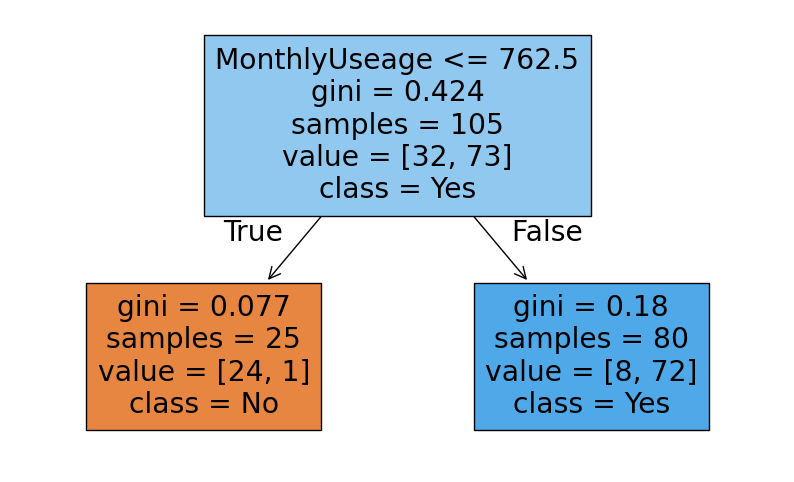

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plot_tree(model,feature_names=['MonthlyUseage','CustomerType','Complaints'],class_names=['No','Yes'],filled=True )
plt.show()

# predict for a new customer

In [63]:
new_data=[[1000,2,3]]
print('Recharge prediction:',model.predict(new_data))

Recharge prediction: [1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 39.12 Exercises
1. What are the advantages of using a decision tree?
2. How does a decision tree decide which feature to split on?
3. Modify the CSV with more examples and observe results.
4. Try pruning the tree to avoid overfitting.
5. Change max_depth or criterion and evaluate changes.
1) What are the advantages of using a decision tree?
Answer:
1]What are the advantages of using a decision tree?
Decision Trees offer several key benefits:
1. Easy to understand and interpret - The rules can be visualized like a flowchart.
2. Handles both numerical and categorical data.
3. No need for data scaling or normalization.
4. Captures non-linear relationships between variables.
5. Feature importance can be extracted easily.
6. Requires minimal data preparation.
They are especially useful when model interpretability is as important as accuracy.

2) How does a decision tree decide which feature to split on?
Answer:
At each node, the decision tree chooses the feature that best separates the data into distinct classes.
It does this by measuring information gain (or reduction in impurity).
Common criteria include:
Gini Impurity (default in scikit-learn)
Entropy/Information Gain
Variance Reduction (for regression)
The feature and threshold producing the highest information gain (or lowest impurity) are chosen for the split.
3) Modify the CSV with more examples and observe results
Answer:
Add more rows in your recharge_data.csv to make the dataset richer.
For example:
Acti

4) Try pruning the tree to avoid overfitting
Answer:
Pruning reduces the size of the tree by removing branches that have little importance.
In scikit-learn, this can be done by setting parameters like:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
This limits how deep the tree grows and ensures each leaf has enough samples.
You can compare accuracy before and after pruning to confirm better generalization.
5) Change max_depth or criterion and evaluate changes
   
7) Answer:
You can experiment with different parameters to see how they affect model behavior.
Example:
from sklearn.tree import DecisionTreeClassifier
# Default
clf1 = DecisionTreeClassifier(criterion="gini", random_state=42)
clfi.fit(X_train, y_train)
#Modified
clf2 DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf2.fit(X_train, y_train)
Compare both using:
print("Default Accuracy:", clf1.score(X_test, y_test))
print("Modified Accuracy:", clf2.score(X_test, y_test))
Observation:
Lower max depth often prevents overfitting but may reduce accuracy slightly.
Changing criterion affects how the split quality is measured (Gini vs Entropy).